## High school contact and friendship network dataset

Data corresponds to student contacts and friendship relations from a high school in France. The dataset provides the id, class, and gender of each student. The nodes are the students and the edges is the contact between the students. Link to data source: http://www.sociopatterns.org/datasets/high-school-contact-and-friendship-networks/

In [46]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [38]:
# Import data
school_data = pd.read_csv('https://raw.githubusercontent.com/SaneSky109/DATA620/main/Data/High-School_data_2013.csv',
                          sep = ' ',
                         header = None,
                         names = ["Time_sec", "StudentID1", "StudentID2", "Class1", "Class2"])
attribute_data = pd.read_csv('http://www.sociopatterns.org/wp-content/uploads/2015/09/metadata_2013.txt',
                   sep = '\t',
                   header = None,
                   names = ["studentID", "Class", "Gender"])

In [51]:
school_data.head(10)

,Time_sec,StudentID1,StudentID2,Class1,Class2
0,1385982020,454,640,MP,MP
1,1385982020,1,939,2BIO3,2BIO3
2,1385982020,185,258,PC*,PC*
3,1385982020,55,170,2BIO3,2BIO3
4,1385982020,9,453,PC,PC
5,1385982020,9,45,PC,PC
6,1385982020,14,190,PC*,PC*
7,1385982020,400,637,2BIO1,2BIO1
8,1385982020,255,275,2BIO3,2BIO3
9,1385982020,176,533,PC*,PC*


In [50]:
attribute_data.head(10)

,studentID,Class,Gender
0,650,2BIO1,F
1,498,2BIO1,F
2,627,2BIO1,F
3,857,2BIO1,F
4,487,2BIO1,F
5,28,2BIO2,M
6,927,2BIO1,F
7,72,2BIO1,F
8,400,2BIO1,F
9,945,2BIO1,F


In [42]:
# Randomly assign 'Gender' to unknown students
attribute_data.index[attribute_data['Gender'] == "Unknown"].tolist()

attribute_data.loc[320,'Gender'] = "F"
attribute_data.loc[321,'Gender'] = "M"
attribute_data.loc[322,'Gender'] = "F"
attribute_data.loc[323,'Gender'] = "F"
attribute_data.loc[324,'Gender'] = "M"
attribute_data.loc[325,'Gender'] = "M"
attribute_data.loc[326,'Gender'] = "M"

[320, 321, 322, 323, 324, 325, 326]

In [64]:
# Create Weights. Students can contact eachother multiple times in a class. Weights can capture how often the students communicate.
weighted_data = school_data.loc[:, 'Time_sec':'StudentID2'].groupby(['StudentID1', 'StudentID2']).count().reset_index()

weighted_data.rename(columns = {'Time_sec':'Contacts'},
                    inplace = True)
weighted_data.head(35)

,StudentID1,StudentID2,Contacts
0,1,55,8
1,1,63,2
2,1,101,1
3,1,106,4
4,1,117,18
5,1,170,8
6,1,179,1
7,1,196,38
8,1,199,2
9,1,202,1


In [71]:
# Add edges and weights to Graph object
G = nx.Graph()
for i in weighted_data.index:
    G.add_edge(weighted_data.iat[i,0],
               weighted_data.iat[i,1], 
               weight = weighted_data.iat[i,2])
    


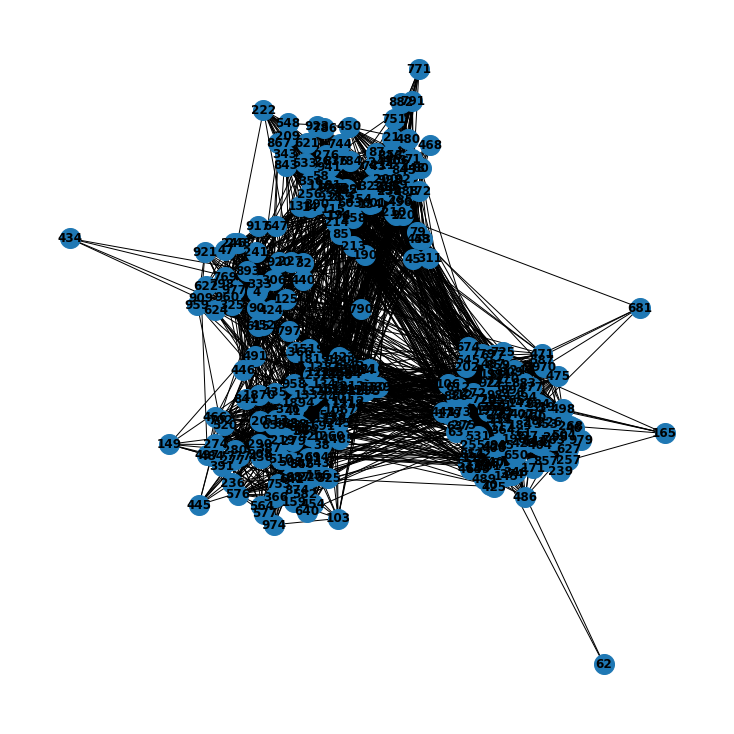

In [72]:
plt.figure(figsize = (10,10))
nx.draw(G, with_labels = True, node_size = 400, font_color = 'black', font_weight = 'bold')